<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en) | <a href="https://erachelson/RLclass_MVA/">https://erachelson.github.io/RLclass_MVA/</a>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Chapter 2: Characterizing value functions: the Bellman equations</div>

<div class="alert alert-success">

**Learning outcomes**  
By the end of this chapter, you should be able to:
- explain what a state-action value function is,
- link optimal policies and value functions,
- write the Bellman equations (evaluation and optimality) and define a value optimization problem,
- write and execute a value iteration algorithm to find an optimal value function for a finite state space MDP.

Additionally, after doing the homework, you should be able to:
- solve the evaluation equation by both matrix inversion and dynamic programming,
- write value iteration as the repeated application of a greediness operator and the evaluation operator,
- explain, write and execute a modified policy iteration algorithm to find an optimal value function for a finite state space MDP,
- explain and discuss the principle of asynchronous dynamic programming for MDPs.
</div>

# Foreword <a class="tocSkip">

In this chapter, we will use reward models interchangeably under the form $r(s,a)$ or $r(s,a,s')$. Similarly, we will manipulate memoryless, stationary policies, either deterministic or stochastic.

Following the notation $X^Y$ for the set of functions from set $Y$ to set $X$, we shall write $\mathbb{R}^S$ the set of functions from $S$ to $\mathbb{R}$. For ease of notation, we shall write $\mathbb{R}^{SA} = \mathbb{R}^{S\times A}$.

Note that when $S$ is discrete, $\mathbb{R}^S$ is isomorphic to $\mathbb{R}^{|S|}$, that is we can represent functions as vectors of values.

# Intuitions

Consider the maze below, where an agent can move North, South, East or West. The resulting transition is deterministic and a reward of $+1$ is gained when exiting the maze (which terminates the game). Otherwise all rewards are zero. Bumping into a wall leaves the agent in place, with a reward of zero.

<center><img src="img/grid_raw.png" width="200px"></img></center>

Let's consider the policy $\pi$ that always moves East.

<center><img src="img/grid_policy.png" width="200px"></img></center>

<div class="alert alert-warning">
    
**Exercise**  
Without writing any equation, what is the value of the top-right cell under this policy?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$V^\pi((3,3)) = 1$
</details>

Now let's take $\gamma=0.9$.

<div class="alert alert-warning">
    
**Exercise**  
Without writing any equation, what is the value of the top-middle cell under this policy? What is the value of the bottom-right cell?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

The value of $(2,3)$ is the expected discounted sum of what one gets from applying $\pi$ from $(2,3)$. Since the $\pi$ is deterministic and the transitions are deterministic too, $\pi(2,3)$ always take us to state $(3,3)$. So $V^\pi((2,3)) = 0 + \gamma \times V^\pi((3,3)) = 0.9$.
    
The value of $(3,1)$ is the expected infinite sum of discounted rewards from $(3,1)$. Since the agent keeps bumping into the wall when applying $\pi$, it never exits the maze and this is an infinite sum of zero terms. Hence $V^\pi((2,3)) = 0$.
</details>

Let's draw the value function.

<center><img src="img/grid_vpi.png" width="200px"></img></center>

Suppose you are currently in cell $(1,2)$ (left column, middle cell) and would like to choose what action to take. Suppose also that you know the value function above. You need to put a scalar value on all four actions to decide which one you prefer. To evaluate each action, let's estimate what we can get by 1) getting an instantaneous reward after applying the action and then 2) using $\gamma \times V^\pi(s)$ to estimate what can obtain in the long run after this first action. Define $Q^\pi((x,y),a)$ as the utility we estimate for each action $a$ in $(x,y)$.

<div class="alert alert-warning">
    
**Exercise**  
What is $Q^\pi((1,2),a)$ for action $a$ in $\{N,S,E,W\}$? What seems to be the most interesting first action to take, if we follow $\pi$ after?  
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$Q^\pi((1,2),N) = 0 + \gamma \cdot \gamma^2 = 0.729$  
$Q^\pi((1,2),S) = 0 + \gamma \cdot 0 = 0$  
$Q^\pi((1,2),E) = 0 + \gamma \cdot 0 = 0$  
$Q^\pi((1,2),W) = 0$  
The best action seems to be $N$.
</details>

An optimal policy is quite easy to guess. Let's draw the optimal value function (the value function of any optimal policy).

<center><img src="img/grid_vopt.png" width="200px"></img></center>

Define $Q^*((x,y),a)$ as the utility we estimate for each action $a$ in $(x,y)$ if it is followed by an optimal policy.
<div class="alert alert-warning">
    
**Exercise**   
What is $Q^*((1,2),a)$ for action $a$ in $\{N,S,E,W\}$? What seems to be the most interesting first action to take, if we act optimally after? Rank the actions by utility.  
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$Q^*$ is what we gain immediately, plus $\gamma$ times what we expect to receive from applying an optimal policy in the state we reach by applying $a$.  
$Q^*((1,2),N) = 0 + \gamma\times\gamma^2=\gamma^3$  
$Q^*((1,2),S) = 0 + \gamma\times\gamma^4=\gamma^5$  
$Q^*((1,2),E) = 0 + \gamma\times\gamma^4=\gamma^5$  
$Q^*((1,2),W) = 0 + \gamma\times\gamma^3=\gamma^4$  
The best action seems to be $N$, followed by $W$, after that $S$ and $E$ are tied.  
We can note the value of $Q^*$ for the action $N$ in $(1,2)$ is equal to the optimal value function $V^*$ in $(1,2)$.
</details>

<div class="alert alert-warning">
    
**Exercise**  
What property has the policy that always picks greedily the $Q^*$ maximizing action in each state?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

It is an optimal policy.
</details>

Now suppose $(1,2)$ is a special slippery cell. Going North has a $0.7$ probability of actually reaching $(1,3)$, but also a $0.2$ probability of staying in $(1,2)$ and a $0.1$ probability of ending in $(2,2)$. Note that this changes the problem and the optimal expected return function $V^*$.

<div class="alert alert-warning">
    
**Exercise**  
Given this new problem, can you write $Q^*((1,2),N)$ as a function of $V^*(1,3)$, $V^*(1,2)$ and $V^*(2,2)$?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

When we take action $N$ in $(1,2)$, there are 3 possible outcomes:
- with probability $0.7$, reach $(1,3)$ and get reward $0$,
- with probability $0.2$, reach $(1,2)$ and get reward $0$,
- with probability $0.1$, reach $(2,2)$ and get reward $0$.

So what we can expect to get from applying $N$ in $(1,2)$ is:  
\begin{align*}
    Q^*((1,2), N) &= 0.7 \times (0+\gamma V^*(1,3)) + 0.2\times(0+\gamma V^*(1,2)) + 0.1\times(0+\gamma V^*(2,2))\\
    &= \gamma \left(0.7\times V^*(1,3) + 0.2\times V^*(1,2)+ 0.1\times V^*(2,2)\right)
\end{align*}
</details>

Now you can remark that if we knew the action $\pi^*((1,2))$ taken by an optimal policy in $(1,2)$, then $Q^*((1,2), \pi^*(1,2))$ would actually be precisely the optimal long-term return $V^*$ (since it would be the expected return of a policy that acts optimally at every time step, including the first one).

<div class="alert alert-warning">
    
**Exercise**  
Suppose an oracle tells us that $\pi^*((1,2))=N$. Using the previous exercice, write $V^*(1,2)$ as a function of $V^*(1,3)$, $V^*(1,2)$ and $V^*(2,2)$.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

We have $V^*((1,2)) = Q^*((1,2),N)$, so
$$V^*((1,2)) = \gamma \left(0.7\times V^*(1,3) + 0.2\times V^*(1,2)+ 0.1\times V^*(2,2)\right)$$
</details>

We have introduced the key concepts upon which this secton is built: $V$ and $Q$ functions, and the relation between $V(s)$ and $V(s')$ when $s'$ can be reached from $s$ in one action. The next steps are now to write all this formally, prove strong properties and derive algorithms for computing value functions and policies.

# The evaluation equation

Drawing inspiration from the exercises above, we can define state-action value functions, also called Q-functions, which are a central object in RL. A Q-function is a function $S\times A \rightarrow \mathbb{R}$.

The state-action value function of policy $\pi$ is noted $Q^\pi$ and is the expected return of playing action $a$ in $s$, then playing policy $\pi$ in any subsequent state.

<div class="alert alert-success"><b>State-action value function</b><br>
$$Q^\pi(s,a) = \mathbb{E}\left( \sum\limits_{t=0}^\infty \gamma^t r\left(S_t, A_t, S_{t+1}\right) \bigg| S_0 = s, A_0=a, \pi \right)$$
</div>

To be precise and reuse the full notations from the MDP definition:
\begin{align*}
Q^\pi(s,a) &=\mathbb{E}\left[ \sum\limits_{t = 0}^\infty \gamma^t R_t \quad \Bigg| \quad \begin{array}{l}S_0 = s, A_0=a,\\ A_t \sim \pi(S_t)\textrm{ for }t>0,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1})\end{array} \right],\\
 &= \mathbb{E}_{s'} \left[ r(s,a,s') + \gamma V^\pi(s') \right], \\
 &= r(s,a) + \gamma \mathbb{E}_{s'} \left[ V^\pi(s') \right]
\end{align*}

<br>
<br>
<center><img src="img/Qfunctions.png" style="height: 200px;"></img></center>

You might remember how we defined the *return* random variable $G^\pi(s)$ for a policy $\pi$, in each state $s$, as the $\gamma$-discounted sum of rewards:
$$G^\pi(s) = \sum\limits_{t = 0}^\infty \gamma^t R_t \quad \Bigg| \quad \begin{array}{l}S_0 = s,\\ A_t \sim \pi(S_t),\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1}).\end{array}$$

This lead to $V^\pi(s) = \mathbb{E}[G^\pi(s)]$.

We can similarly define the *state-action return* random variable $G^\pi(s,a)$ for a policy $\pi$, in each state-action pair $(s,a)$, as the $\gamma$-discounted sum of rewards:
$$G^\pi(s,a) = \sum\limits_{t = 0}^\infty \gamma^t R_t \quad \Bigg| \quad \begin{array}{l}S_0 = s, A_0=a\\ A_t \sim \pi(S_t) \textrm{ for }t>0,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1}).\end{array}$$

An then we have $Q^\pi(s,a) = \mathbb{E}[G^\pi(s,a)]$.

Note that this definition of Q-functions uses the $\gamma$-discounted criterion, but that it can be straightforwardly extended to any other criterion.  
Let $C((R_t)_{t\in \mathbb{N}})$ be a criterion defined on the sequence of reward random variables.  
Then the return random variable $G^\pi(s,a)$ is the random variable $C((R_t)_{t\in \mathbb{N}})$ given that $S_0 = s$, $A_0=a$, $A_t \sim \pi(S_t)$ for $t>0$, $S_{t+1}\sim p(\cdot|S_t,A_t)$, and $R_t = r(S_t,A_t,S_{t+1})$.  
And the corresponding Q-function for this criterion is simply 
$$Q^\pi(s,a) = \mathbb{E}\left[ C((R_t)_{t\in \mathbb{N}}) \quad \Bigg| \quad \begin{array}{l}S_0 = s, A_0=a,\\ A_t \sim \pi(S_t)\textrm{ for }t>0,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1})\end{array} \right|.$$

Let's remark that $V^\pi(s) = Q^\pi(s,\pi(s))$. Let's replace $a$ by $\pi(s)$ above and we obtain an important equation to characterize $V^\pi$.
<br>
<br>
<center><img src="img/V-DP.png" style="height: 200px;"></img></center>
$$V^\pi(s) = r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ V^\pi(s') \right]$$

This equation uses $V^\pi(s')$ in all $s'$ reachable from $s$ to define $V^\pi(s)$.  
Since this equation is true in all $s$, this provides as many equations as we have states.

<div class="alert alert-success"><b>Theorem: evaluation equation</b><br>
$V^\pi$ obeys the linear system of equations:
$$
V^\pi\left(s\right) = r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ V^\pi(s') \right]\\
$$
Similarly:
$$
Q^\pi\left(s,a\right) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ Q^\pi(s',\pi(s')) \right]
$$
</div>

This leads to the introduction of the **Bellman evaluation operator**:
<div class="alert alert-success"><b>Evaluation operator $T^\pi$</b><br>
$T^\pi$ is an operator on value functions, that transforms a function $V:S\rightarrow \mathbb{R}$ into:
\begin{align*}
T^\pi V\left(s\right) &= r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ V(s') \right]\\
 &= r\left(s,\pi\left(s\right)\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right)
\end{align*}
    
Similarly we can introduce an evaluation operator (with the same name $T^\pi$) over state-action value functions. <br> 
$T^\pi$ is an operator on state-action value functions, that transforms a function $Q:S\times A\rightarrow \mathbb{R}$ into:
\begin{align*}
T^\pi Q\left(s,a\right) &= r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ Q(s',\pi(s')) \right]\\
 &= r\left(s,a\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,a\right) Q\left(s', \pi\left(s'\right)\right)
\end{align*}
</div>

Note that, fundamentally, we have written 4 times the same thing in the block above.  
So finding $V^\pi$ (resp. $Q^\pi$) boils down to solving the evaluation equation $V= T^\pi V$ (resp. $Q = T^\pi Q$).

<div class="alert alert-warning">

**Exercise**  
Let's write these equations a few more times. We have written them for a memoryless deterministic policy and a reward model of the form $r(s,a)$. Can you write $T^\pi V$ and $T^\pi Q$ for a memoryless stochastic policy and a reward model of the form $r(s,a,s')$?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$$T^\pi V\left(s\right) = \mathbb{E}_{\substack{a \sim \pi(a|s) \\ s'\sim p(s'|s,a)}} \left[ r(s,a,s') + \gamma V(s') \right]$$

$$T^\pi Q\left(s,a\right) = \mathbb{E}_{\substack{s'\sim p(s'|s,a) \\ a' \sim \pi(a'|s')}} \left[ r(s,a,s') + \gamma Q(s',a') \right]$$
</details>

Let's write the evaluation operator (yet) another time. This time, we want to focus on random variables and name them.

Let us define a *bootstrapped return* $G^\pi_m(s,a,Q)$, for $m\geq 1$, as the random variable:
$$G^\pi_m(s,a,Q) = \sum\limits_{t = 0}^{m-1} \gamma^t R_t + \gamma^m Q(S_m, A_m) \quad \Bigg| \quad \begin{array}{l}S_0 = s, A_0=a\\ A_t \sim \pi(S_t)\textrm{ for }t>0,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1}).\end{array}$$

Note that this term of *bootstrap* has nothing to do with the statistical procedure of *[bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))* and is fully related to the idea of appending a "bootstrap" value at the end of a sequence of sampled rewards. It is a historical term whose use will be crucial in the next chapter. 

In particular:
$$G^\pi_1(s,a,Q) = R_0 + \gamma Q(S_1, A_1) \quad \Bigg| \quad \begin{array}{l}S_0 = s, A_0=a\\ A_1 \sim \pi(S_1),\\ S_{1}\sim p(\cdot|S_0,A_0),\\ R_0 = r(S_0,A_0,S_{1}).\end{array}$$

<div class="alert alert-warning">

**Exercise**  
What is the link between $(T^\pi Q)(s,a)$ and $G^\pi_1(s,a,Q)$?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$$(T^\pi Q)(s,a) = \mathbb{E} \left[ G^\pi_1(s,a,Q) \right]$$

This last exercise was not for pure amusement: it will come in handy later on.
</details>

We have gone far from our inspiration problems (the patient prescription, FrozenLake). Let's make all this very concrete:
- A policy $\pi$ is an agent's behaviour
- In every state $s$, one can expect to gain $V^\pi(s)$ in the long run by applying $\pi$
- $V^\pi(s)$ is the sum of the reward on the first step $r(s,\pi(s))$ and the expected long-term return from the next state $\gamma \mathbb{E}_{s'} \left[V^\pi(s')\right]$ 
- The function $V^\pi$ actually obeys the linear system of equations above that simply link the value of a state with the values of its successors in an episode.

We can stop for a minute on the $T^\pi$ evaluation operator (that maps a function $S\rightarrow\mathbb{R}$ to another function $S\rightarrow\mathbb{R}$) and the search for $V^\pi$.

<div class="alert alert-success"><b>Properties of $T^\pi$</b><br>
<ol>
<li> $T^\pi$ is an affine operator, it defines a linear system of equations.<br>
<li> $T^\pi$ is a contraction mapping<br>
    Specifically, with $\gamma<1$, $T^\pi$ is a $\| \cdot \|_\infty$-contraction mapping over the $\mathbb{R}^S$ (resp. $\mathbb{R}^{S A}$) Banach space.<br>
$\Rightarrow$ With $\gamma<1$, $V^\pi$ (resp. $Q^\pi$) is the unique solution to the (linear) fixed point equation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V=T^\pi V$ (resp. $Q=T^\pi Q$).
</ol>
</div>

# Dynamic programming for the evaluation equation

Let's use this second property to compute $Q^\pi$ for the policy that always moves right on FrozenLake.

Suppose we start with $Q_0(s,a) = 0$ for all $(s,a)$.

Recall that, in FrozenLake, rewards are provided under the $r(s,a,s')$ form.

Applying $T^\pi$ once results in:
$$Q_1(s,a) = \sum_{s'} p(s'|s,a) \left[ r(s,a,s') + \gamma Q_0(s',\pi(s')) \right]$$

In plain words, $Q_1$ is the one-step expected return under policy $\pi$.

Applying $T^\pi$ twice results in:
$$Q_2(s,a) = \sum_{s'} p(s'|s,a) \left[ r(s,a,s') + \gamma Q_1(s',\pi(s')) \right]$$

This is the two-step expected return.

And so on.

If we apply $T^\pi$ enough times, $Q_n$ should become closer to $Q^\pi$, whatever the chosen value for $Q_0$.

In more formal words, because $T^\pi$ is a contraction mapping, the sequence $Q_{n+1} = T^\pi Q_n$ converges to $T^\pi$'s fixed point.

Because the procedure of repeatedly applying $T^\pi$ breaks the problem of evaluating $\mathbb{E} [\sum_t \gamma^t R_t]$ into sub-problems of increasing horizon, it is a **[dynamic programming](https://www.jstor.org/stable/j.ctv1nxcw0f)** procedure.

<div class="alert alert-warning"><b>Exercise (together)</b><br>
Let's compute the sequence $Q_{n+1} = T^\pi Q_n$.
</div>

In [1]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
# use render_mode="human" to open the game window
env = gym.make('FrozenLake-v1', render_mode="ansi")

pi = fl.RIGHT*np.ones((env.observation_space.n), dtype=np.uint8)
nb_iter = 20
gamma = 0.9

Q = np.zeros((env.observation_space.n, env.action_space.n))
Qpi_sequence = [Q]
for i in range(nb_iter):
    Qnew = np.zeros((env.observation_space.n, env.action_space.n))
    for x in range(env.observation_space.n):
        for a in range(env.action_space.n):
            outcomes = env.unwrapped.P[x][a]
            for o in outcomes:
                p = o[0]
                y = o[1]
                r = o[2]
                Qnew[x,a] += p * (r + gamma * Q[y,pi[y]])
    Q = Qnew
    Qpi_sequence.append(Q)

<div class="alert alert-warning"><b>Exercise (together)</b><br>
Let's plot the sequence of $\| Q_n - Q_{n-1} \|_\infty$ to verify the convergence of the sequence. Comment on the decrease rate and the contraction mapping property.
</div>

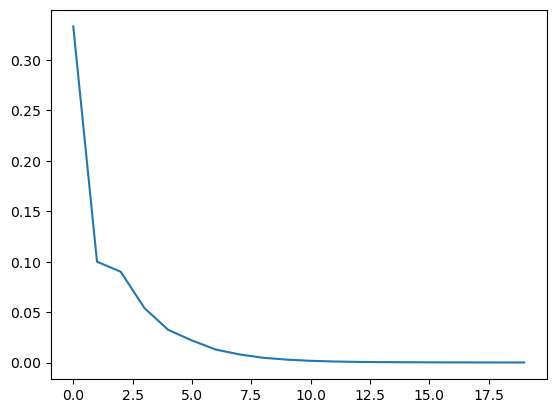

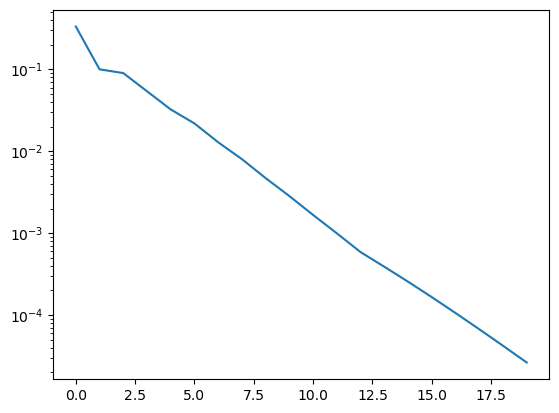

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

residuals = []
for i in range(1, len(Qpi_sequence)):
    residuals.append(np.max(np.abs(Qpi_sequence[i]-Qpi_sequence[i-1])))

plt.plot(residuals)
plt.figure()
plt.semilogy(residuals);

# The optimality equation

We can unfold the same kind of reasoning on the value of an optimal policy. We write:
$$V^{\pi^*} = V^*, \quad Q^{\pi^*} = Q^*$$

<div class="alert alert-success">
    
**Theorem: Optimal greedy policy**  

Any policy $\pi$ defined by $\pi(s) \in \arg\max\limits_{a\in A} Q^*(s,a)$ is an optimal policy.

For stochastic policies: any policy $\pi$ defined by $\pi(s) \in \arg\max\limits_{\delta \in \Delta_A} \mathbb{E}_{a\sim \delta} [Q^*(s,a)]$ is an optimal policy.
</div>

And $Q^*$ obeys the same type of recurrence relation:

<div class="alert alert-success"><b>Theorem: Bellman optimality equation</b><br>
The optimal value function obeys:
\begin{align*}
    V^*(s) &= \max\limits_{a\in A} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} V^*(s') \right]\\
        &= \max\limits_{a\in A} \left[ r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a) V^*(s') \right]
\end{align*}
or in terms of $Q$-functions:
\begin{align*}
    Q^*(s,a) &= r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ \max_{a'\in A} Q^*(s',a') \right]\\
        &= r(s,a) + \gamma \sum\limits_{s'\in S}p(s'|s,a) \max\limits_{a'\in A} Q^*(s',a')
\end{align*}
</div>

As for the evaluation equation, we have actually written 4 times the same thing in the block above.  
We have also defined the **Bellman optimality operator $T^*$** (on $V$ and $Q$ functions) as:
<div class="alert alert-success"><b>Bellman optimality operator</b><br>
$$\left(T^*V\right)(s) = \max\limits_{a\in A} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} V(s') \right]$$
$$\left(T^*Q\right)(s,a) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ \max_{a'\in A} Q(s',a') \right]$$
</div>

So finding $V^*$ (resp. $Q^*$) boils down to solving $V= T^* V$ (resp. $Q = T^* Q$).

<div class="alert alert-warning">

**Exercise**  
Let's write these equations a few more times. We have written them for a reward model of the form $r(s,a)$. Can you write $T^* V$ and $T^* Q$ for a reward model of the form $r(s,a,s')$?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$$\left(T^*V\right)(s) = \max\limits_{a\in A} \mathbb{E}_{s'\sim p(s'|s,a)} \left[ r(s,a,s') + \gamma V(s') \right]$$
$$\left(T^*Q\right)(s,a) = \mathbb{E}_{s'\sim p(s'|s,a)} \left[r(s,a,s') + \gamma \max_{a'\in A} Q(s',a') \right]$$
</details>

<div class="alert alert-success"><b>Properties of $T^*$</b><br>
<ol>
<li> $T^*$ is non-linear.<br>
<li> $T^*$ is a contraction mapping<br>
With $\gamma<1$, $T^*$ is a $\| \cdot \|_\infty$-contraction mapping over the $\mathbb{R}^S$ (resp. $\mathbb{R}^{S A}$) Banach space.<br>
$\Rightarrow$ With $\gamma<1$, $V^*$ (resp. $Q^*$) is the unique solution to the fixed point equation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V=T^* V$ (resp. $Q=T^* Q$).
</ol>
</div>

# Dynamic programming for the optimality equation

Repeatedly applying $T^*$ to an initial function $Q_0$ yields the sequence $Q_{n+1} = T^* Q_n$ that converges to $Q^*$.

<div class="alert alert-success">

**Value iteration**  
The algorithm that computes the sequence $Q_{n+1} = T^* Q_n$ for a finite number of iterations is called **value iteration**.
</div>

In practice, to compute $Q_{n+1}$ in a finite state and action space MDP, one loops through all states $s$ and actions $a$ and sets $Q_{n+1} = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} [ \max_{a'\in A} Q_n(s',a') ]$ for each $(s,a)$ pair. Note that each of these assignments requires looping through states once again to compute the expectation.

<div class="alert alert-warning">
    
**Exercise**  
What is the time complexity of one iteration in value iteration, in terms of $|S|$ and $|A|$?  
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$O(|S|^2 |A|)$
</details>

If you are curious about the complexity of value iteration (and related algorithms), two good reads are:  
Papadimitriou, C. H., & Tsitsiklis, J. N. (1987). **[The complexity of Markov decision processes](https://www.jstor.org/stable/3689975?seq=7)**. Mathematics of operations research, 12(3), 441-450.  
Littman, M. L., Dean, T. L., & Kaelbling, L. P. (1995). **[On the complexity of solving Markov decision problems](https://dl.acm.org/doi/abs/10.5555/2074158.2074203)**. In Proceedings of the Eleventh conference on Uncertainty in artificial intelligence (pp. 394-402).

The pseudo-code of value iteration is quite straightforward and left as a homework exercise.

<div class="alert alert-warning"><b>Exercise (value iteration)</b><br>
Let's compute the sequence $Q_{n+1} = T^* Q_n$ for FrozenLake.
</div>

In [3]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
# use render_mode="human" to open the game window
env = gym.make('FrozenLake-v1', render_mode="ansi")

nb_iter = 20
gamma = 0.9
Q = np.zeros((env.observation_space.n, env.action_space.n))
Qopt_sequence = [Q]
for i in range(nb_iter):
    Qnew = np.zeros((env.observation_space.n, env.action_space.n))
    for x in range(env.observation_space.n):
        for a in range(env.action_space.n):
            outcomes = env.unwrapped.P[x][a]
            for o in outcomes:
                p = o[0]
                y = o[1]
                r = o[2]
                Qnew[x,a] += p * (r + gamma*np.max(Q[y,:]) )
    Q = Qnew
    Qopt_sequence.append(Q)

<div class="alert alert-warning"><b>Exercise (convergence of VI)</b><br>
Let's plot the sequence of $\| Q_n - Q_{n-1} \|_\infty$ to verify the convergence of the sequence.
</div>

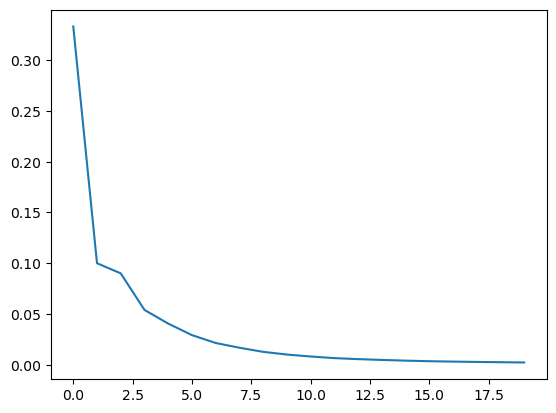

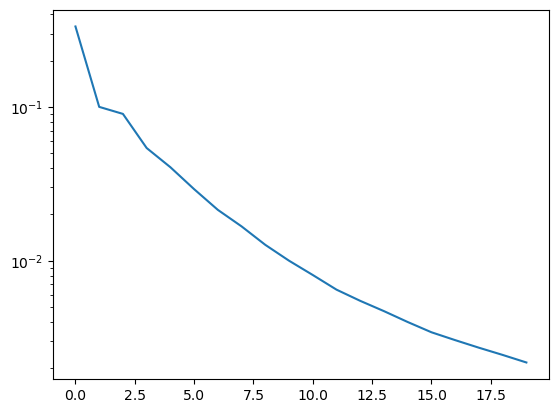

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

residuals = []
for i in range(1, len(Qopt_sequence)):
    residuals.append(np.max(np.abs(Qopt_sequence[i]-Qopt_sequence[i-1])))

plt.plot(residuals)
plt.figure()
plt.semilogy(residuals);

There are alternatives to Value Iteration with algorithms such as Gauss-Seidel Value Iteration, Asynchronous Value Iteration, Policy Iteration or Modified Policy Iteration for instance. Check the exercises below to go further.

# Summary

In this section, we have built upon the MDP properties of the environment we wish to control, in order to characterize policies through their value functions.

We have learned that:
- $Q^\pi$ is a solution to the Bellman evaluation equation
$$Q = T^\pi Q$$
- $Q^*$ is a solution to the Bellman optimality equation
$$Q = T^* Q$$
- Value Iteration constructs the sequence of $Q_{n+1} = T^* Q_n$ value functions

So we have built the second stage of our three-stage rocket:
<div class="alert alert-success">

**What is an optimal strategy?**  
An optimal policy is one that yields optimal cumulated rewards. It is a policy that is *greedy* with respect to an optimal value function $Q^*$. Such a value function obeys Bellman's optimality equation and can be computed via dynamic programming.
</div>

Still, we are dependent on a characterization of $\pi^*$ that relies on the knowledge of the MDP.

But we could imagine that we use a procedure that *learns* $Q_{n+1}$ from samples of $T^* Q_n$. If such samples can be obtained from interaction with the system to control, it might be possible to learn $Q^*$ without knowing the MDP: that's where we really start talking about *reinforcement learning*.

# Homework

The exercises below are here to help you play with the concepts introduced above, to better grasp them. They also introduce additional important notions. They are not optional to reach the class goals. Often, the provided answer reaches out further than the plain question asked and provides comments, additional insights, or external references.

## Dynamic programming for the evaluation equation

As we've seen above, one can apply the principle of dynamic programming to both the evaluation and the optimality operators: use a value function $V_0$ (abstracting an $n$-step horizon criterion) to derive a value function $V_1 = T V_0$ (over $n+1$ steps). We will keep the name *value iteration* for the algorithm that does this for the optimality operator $T^*$ only, although some authors might use it for the repeated application of $T^\pi$ too.

<div class="alert alert-warning">

**Exercise**  
Write a function `Q_from_V(env,V)` that computes the $|S|\times |A|$ matrix $Q^\pi$, given $V^\pi$ for FrozenLake. Use $\gamma=0.9$.<br>
Suppose $V^\pi(s)=0$ in all $s$. Use your function to compute $Q^\pi(s,a)$ given $V^\pi$. Comment.
</div>

Recall that in the previous class, we introduced a few utility functions and accessed the transition probabilities and rewards of FrozenLake using the `env.unwrapped.P`. These are recalled below.

In [1]:
# %load solutions/fl_actions.py
import gymnasium.envs.toy_text.frozen_lake as fl
actions = {fl.LEFT: '\u2190', fl.DOWN: '\u2193', fl.RIGHT: '\u2192', fl.UP: '\u2191'}

In [2]:
# %load solutions/fl_to_s.py
def to_s(env,row,col):
    return row*env.unwrapped.ncol+col

In [3]:
# %load solutions/fl_to_row_col.py
def to_row_col(env,s):
    col = s%env.unwrapped.ncol
    row = int((s-col)/env.unwrapped.ncol)
    return row,col

In [4]:
# Testing the utility functions
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
from solutions.RL1_utility_functions import *
from solutions.fl_actions import actions
from solutions.fl_to_s import to_s
from solutions.fl_to_row_col import to_row_col

env = gym.make('FrozenLake-v1', render_mode="ansi")

state = to_s(env,0,1)
action = 0
outcomes = env.unwrapped.P[state][action]
print(outcomes)
print()
print("outcomes for the transition from state ", to_row_col(env,state), " and action ", actions[action], ":", sep='')
for o in outcomes:
    proba      = o[0]
    next_state = o[1]
    reward     = o[2]
    isTerminal = o[3]
    print(" reach state ", to_row_col(env,next_state), \
          " and get reward ", reward, \
          " with proba ", proba, ". ", sep='', end="")
    if isTerminal:
        print("Transition is terminal.")
    else:
        print("Transition is not terminal.")

ModuleNotFoundError: No module named 'solutions.RL1_utility_functions'

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).

In [6]:
# %load solutions/fl_Q_from_V.py
def Q_from_V(env, V, gamma=0.95):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for state in range(env.observation_space.n):
        action = 0
        outcomes = env.unwrapped.P[state][action]
        for o in outcomes:
            proba      = o[0]
            next_state = o[1]
            reward     = o[2]
            isTerminal = o[3]
            Q[state, action]+=proba * (reward+gamma * V[next_state])
    return Q

In [7]:
import gymnasium as gym
import numpy as np

env = gym.make('FrozenLake-v1', render_mode="ansi")

V = np.zeros((env.observation_space.n))
Q = Q_from_V(env,V)
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


<div class="alert alert-warning">
    
**Exercise**  
Write a function `greedyQpolicy(env,Q)` that takes a $Q$ function for FrozenLake and returns the greedy policy as an array of action indices.<br>
Use the utility function below to print the greedy policy for the $Q$ function of the previous exercise in a human-friendly format.<br>
Comment.
</div>

In [8]:
# %load solutions/fl_print_policy.py
from solutions.fl_actions import actions
from solutions.fl_to_s import to_s

def print_policy(env,pi):
    for row in range(env.unwrapped.nrow):
        for col in range(env.unwrapped.ncol):
            print(actions[pi[to_s(row,col)]], end='')
        print()
    return

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).

In [9]:
# %load solutions/fl_greedyQpolicy.py
def greedyQpolicy(env,Q):
    return np.argmax(Q, axis=1)

In [10]:
import gymnasium as gym
import numpy as np
from  solutions.fl_print_policy import print_policy
from solutions.fl_Q_from_V import Q_from_V

env = gym.make('FrozenLake-v1', render_mode="ansi")

V = np.zeros((env.observation_space.n))
Q = Q_from_V(env,V)
pi = greedyQpolicy(env,Q)
print(pi)
print_policy(env,pi)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
←←←←
←←←←
←←←←
←←↓←


<div class="alert alert-warning">
    
**Exercise (variations on the theme of the evaluation equation)**  

When we introduced the evaluation operator we wrote that finding $V^\pi$ (resp. $Q^\pi$) boiled down to solving the evaluation equation $V= T^\pi V$ (resp. $Q = T^\pi Q$).  
- Suppose the state space is finite. Write $V= T^\pi V$ as matrix-vector equations. Explain the dimension of all variables.
- How does this extend to the case of continuous state spaces?
- Write the evaluation equation for a stochastic policy in a discrete state-action space MDP (yes, we have almost done it in class, this is just a reminder).
- Repeat the previous questions for $Q = T^\pi Q$.

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

- When the state space is discrete:  
$V$ is a vector of size $|S|$,  
$P^\pi$ is a matrix containing the values $P^\pi_{ij} = p\left(s_j|s_i,\pi(s_i)\right)$   
and, similarly, $r^\pi$ is a vector containing the values $r^\pi_i = r(s_i,\pi(s_i))$.  
In better words, $P^\pi$ is the <i>transition kernel</i> of the Markov chain describing the state dynamics under policy $\pi$ and $r^\pi$ is the associated reward model.  
Then $T^\pi$ is the linear operator in $\mathbb{R}^{|S|}$ that maps $V$ to $r^\pi + \gamma P^\pi V$.

- This generalizes straightforwardly to the continuous states case:   
$V$ is a function in the $\mathbb{R}^S$ function space (the generalization of the vector in the previous sentence),    
$r^\pi$ becomes the function $s\mapsto r(s,\pi(s))$    
and  $P^\pi$ becomes the linear operator over $\mathbb{R}^S$ that maps function $V$ to function $s\mapsto \int\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right)ds'$.  
Then $T^\pi$ is the linear operator in $\mathbb{R}^S$ that maps $V$ to the function $s\mapsto r^\pi(s) + \gamma (P^\pi V)(s) = r\left(s,\pi\left(s\right)\right) + \gamma \int\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right)ds'$.

- For stochastic policies:
\begin{align*}
    \quad V^\pi(s) &= \mathbb{E}_{a\sim\pi(a|s)} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ V^\pi\left(s'\right) \right] \right] \\
        &= \sum\limits_{a\in A} \pi(a|s) \left(r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a)V^\pi(s') \right)
\end{align*}<br>
<br>
If you prefer using $r(s,a,s')$ instead of $r(s,a)$:<br>
\begin{align*}
    V^\pi\left(s\right) &= \mathbb{E}_{\substack{a\sim \pi(s)\\ s'\sim p(s'|s,a)}} \left[ r(s,a,s') + \gamma V^\pi\left(s'\right) \right]\\
        &= \sum\limits_{s'\in S} \sum\limits_{a\in A} p\left(s'|s,a\right) \pi\left(a|s\right) \left[ r\left(s,a,s'\right) + \gamma V^\pi\left(s'\right) \right]
    \end{align*}
</details>

<div class="alert alert-warning">
    
**Exercise**  
We have seen that $T^\pi$ is an affine operator. 
For a discrete state and action space, write $V^\pi$ the vector of values functions. What is the size of this vector? Write the evaluation equation as a set of operations on such vectors. Deduce a closed-form solution to the evaluation equation on $V$.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

$V^\pi$ is a column vector that lives in $\mathbb{R}^{|S|}$.  

Let $V$ be a column vector of $\mathbb{R}^{|S|}$. The evaluation operator is written:
$$(T^\pi V) (s) = r\left(s,\pi\left(s\right)\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right).$$
So this is a row of the $V=T^\pi V$ equation.

Let $p^\pi(s)$ be the row vector composed of:
$$p^\pi(s) = \left(p(s'|s,\pi(s))\right)_{s'\in S}.$$
And let $r^\pi(s)$ be the scalar $r(s,\pi(s))$. Then the evaluation operator can be written:
$$(T^\pi V)(s) = r^\pi(s) + \gamma p^\pi(s)\cdot V(s).$$

Let $P^\pi$ be the matrix obtained by stacking all row vectors $p^\pi(s)$ on top of each other.  
    $P^\pi$ is the transition kernel of the Markov chain defined by the MDP and the policy $\pi$.  
Let also $r^\pi$ be the column vector of all $r^\pi(s)$.  
Then the evaluation operator can be written in matrix-vector form as:
$$T^\pi V = r^\pi + \gamma P^\pi V.$$

Since $V^\pi$ is a solution to $V = T^\pi V$, one has $V = r^\pi + \gamma P^\pi V$.  
So $(I-\gamma P^\pi) V = r^\pi$.  
Since $P^\pi$ is a probability matrix, all its eigenvalues are smaller or equal to one.  
So the eigenvalues of $\gamma P^\pi$ are all strictly smaller than one (because $\gamma <1$).  
Consequently $I-\gamma P^\pi$ has only strictly positive eigenvalues and is thus invertible. Finally, the unique solution to $V = T^\pi V$ is:
$$V^\pi = \left( I - \gamma P^\pi \right)^{-1} r^\pi.$$
</details>

<div class="alert alert-warning">
    
**Exercise**  
Generalize the code above to a function `policy_eval_lin` that takes any policy as input. We'll suppose in this case that the policy is an array of actions.
Use the previous exercise to function `policy_eval_lin(env,pi)` that computes $V^\pi$ by matrix inversion. The policy `pi` is given as an array of actions. To do this, you'll need to compute $r^\pi$ and $P^\pi$. Again, $\gamma = 0.9$.  
Take the policy that always moves right and check if your result for $V^\pi(s_0)$ is consistent with the Monte Carlo estimate of the previous chapter's exercises.
</div>

Use the cell below to recall the solution to the Monte Carlo estimation exercise.

In [11]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
from solutions.fl_mc_eval import mc_eval

env = gym.make('FrozenLake-v1', render_mode="ansi")
pi = fl.RIGHT*np.ones((env.observation_space.n))
Vepisode = mc_eval(env,pi,100000)
print("value estimate:", np.mean(Vepisode))
print("return variance:", np.std(Vepisode))

value estimate: 0.012848676211639386
return variance: 0.07490669013436001


In [14]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).
def policy_eval_lin(env,pi, gamma=0.9):
    R = np.zeros(env.observation_space.n)
    T = np.zeros((env.observation_space.n, env.observation_space.n))
    for state in range(env.observation_space.n):
        action = pi[state]
        outcomes = env.unwrapped.P[state][action]
        for o in outcomes:
            proba, next_state, reward, done = o
            R[state] += proba * reward
            T[state, next_state] += gamma * proba
    return np.linalg.inv(np.eye(env.observation_space.n)-T)@R

In [ ]:
# %load solutions/fl_policy_eval_lin.py

In [15]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
env = gym.make('FrozenLake-v1', render_mode="ansi")
pi0 = fl.RIGHT*np.ones((env.observation_space.n))
V_pi0 = policy_eval_lin(env,pi0)
print(V_pi0)

[1.30776757e-02 1.17595819e-02 2.74390244e-02 2.03374188e-16
 1.87549947e-02 9.25185854e-17 6.40243902e-02 2.71165584e-16
 4.94389734e-02 1.46041583e-01 1.85975610e-01 0.00000000e+00
 0.00000000e+00 3.00829668e-01 5.55894309e-01 0.00000000e+00]


<div class="alert alert-warning">
    
**Exercise**      
Generalize the code provided in the section about the evaluation equation to write two functions that compute the value function of any policy, using the contraction mapping property.  
The first function is `policy_eval_iter(env,pi,max_iter)`; it takes a policy `pi` and applies $T^\pi$ `max_iter` times by updating each state's value individually.  
The second function is `policy_eval_iter_mat(env,pi,max_iter)`; it takes a policy `pi` and applies $T^\pi$ `max_iter` times using matrix-vector operations.  
</div>

In [23]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).
def policy_eval_iter(env,pi,max_iter, gamma=0.9):
    V = np.zeros(env.observation_space.n)
    for index_iteration in range(max_iter):
        Vnew = np.zeros(env.observation_space.n)
        for state in range(env.observation_space.n):
            action = pi[state]
            outcomes = env.unwrapped.P[state][action]
            for o in outcomes:
                proba, next_state, reward, done = o
                Vnew[state]+=proba * (reward + gamma * V[next_state])
        V = Vnew
    return V
def policy_eval_iter_mat(env,pi, max_iter, gamma=0.9):
    R = np.zeros(env.observation_space.n)
    T = np.zeros((env.observation_space.n, env.observation_space.n))
    for state in range(env.observation_space.n):
        action = pi[state]
        outcomes = env.unwrapped.P[state][action]
        for o in outcomes:
            proba, next_state, reward, done = o
            R[state] += proba * reward
            T[state, next_state] += gamma * proba
    V = np.zeros(env.observation_space.n)
    for index_iteration in range(max_iter):
        V = R+T@V
    return V

In [ ]:
# %load solutions/fl_policy_eval_iter.py

In [24]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
env = gym.make('FrozenLake-v1', render_mode="ansi")
pi0 = fl.RIGHT*np.ones((env.observation_space.n))
V_pi0 = policy_eval_iter(env,pi0,10000)
print(V_pi0)

V_pi0 = policy_eval_iter_mat(env,pi0,10000)
print(V_pi0)

[0.01307768 0.01175958 0.02743902 0.         0.01875499 0.
 0.06402439 0.         0.04943897 0.14604158 0.18597561 0.
 0.         0.30082967 0.55589431 0.        ]
[0.01307768 0.01175958 0.02743902 0.         0.01875499 0.
 0.06402439 0.         0.04943897 0.14604158 0.18597561 0.
 0.         0.30082967 0.55589431 0.        ]


<div class="alert alert-warning">
    
**Exercise and a word on residuals.**  
    
Between two applications of $T^\pi$, the distance between $V_{n+1}$ and $V_n$ decreases as $\|V_{n+1}-V_n\| = \|r^\pi + \gamma P^\pi V_n - V_n\|$. Since $T^\pi$ is a contraction mapping, we have $\|V_{n+1}-V_n\| < \|V_{n}-V_{n-1}\|$. Let's call this distance at time step $n$ the **residual**. Then the successive residuals monotonically tend to zero.  
   
Use this property on the residuals to modify `policy_eval_iter_mat(env,pi,max_iter)` into a `policy_eval_iter_mat2(env,pi,epsilon,max_iter)` function, by adding a precision parameter `epsilon` that specifies the maximum error allowed on $V^\pi$. Return both $V^\pi$ and the sequence of residuals.  
Note: we still keep a maximum number of iterations in the functions to stop the computation in case one specifies an `epsilon` that is too small.   
Plot the sequence of residuals and display the number of iterations necessary to reach the chose precision `epsilon`. Comment.
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).

In [ ]:
# %load solutions/fl_policy_eval_iter_mat2.py

In [ ]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1', render_mode="ansi")
pi0 = fl.RIGHT*np.ones((env.observation_space.n))
V_pi0, residuals = policy_eval_iter_mat2(env,pi0,1e-4,10000)
print(V_pi0)
plt.plot(residuals)
plt.figure()
plt.semilogy(residuals)
print("number of iterations:", residuals.size)
print("last residual", residuals[-1])

## Value iteration

As we've seen before, value iteration is the algorithm that immediately stems from the contraction mapping property of $T^*$.

Let's use this to compute $V^*$. We need to remember that since $T^*$ is a contraction mapping, the sequence $V_{n+1}=T^* V_n$ converges to $T^*$'s fixed point (which happens to be $V^*$ according to the property).

<div class="alert alert-warning">
    
**Exercise**  

Write a function `value_iteration(env, V0, epsilon, max_iter)` that takes `V0` as initial value function, and applies $T^*$ repeatedly until the residual is smaller than `epsilon` or at most `max_iter` iterations have been made. Return the value function and the sequence of residuals. Again, $\gamma = 0.9$.  
The solution to this exercise is almost the same code as that we have seen in class.  
Plot the residuals and comment.
</div>

In [30]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).
def value_iteration(env, V0, epsilon, max_iter, gamma=0.9):
    V = V0
    residuals = []
    
    for index_iteration in range(max_iter):
        Vnew = np.zeros(env.observation_space.n)
        for state in range(env.observation_space.n):
            action_reward = np.zeros(env.action_space.n)
            for action in range(env.action_space.n):
                outcomes = env.unwrapped.P[state][action]
                for o in outcomes:
                    proba, next_state, reward, done = o
                    action_reward[action]+=proba * (reward + gamma * V[next_state])
            Vnew[state] = np.max(action_reward)
        residuals.append(np.linalg.norm(V-Vnew))
        if residuals[-1]<epsilon:
            break
        V = Vnew
    return V, np.array(residuals)

In [ ]:
# %load solutions/fl_value_iteration.py

[0.06856828 0.06114123 0.07421044 0.05558823 0.09156114 0.
 0.11210093 0.         0.14519877 0.24733676 0.29950482 0.
 0.         0.37982023 0.63895955 0.        ]
number of iterations: 50
last residual 8.774663805220621e-05


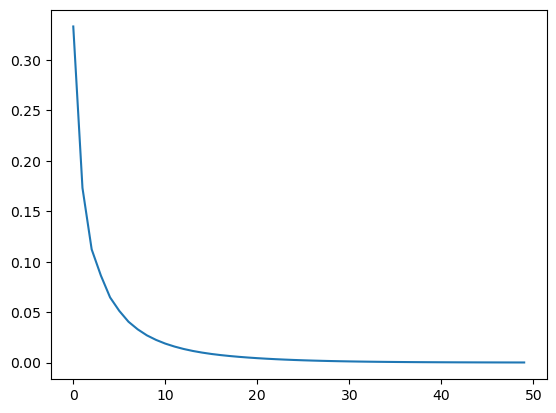

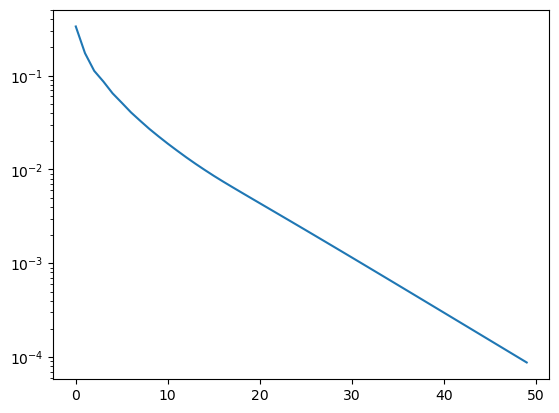

In [31]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1', render_mode="ansi")
Vinit = np.zeros((env.observation_space.n))
Vstar, residuals = value_iteration(env, Vinit, 1e-4, 10000)
print(Vstar)
plt.plot(residuals)
plt.figure()
plt.semilogy(residuals)
print("number of iterations:", residuals.size)
print("last residual", residuals[-1])

<div class="alert alert-warning"><b>Exercise</b><br>
Write the pseudo-code of Value Iteration for $V$ functions.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

Input data: $V$, $\epsilon$<br>
Init: $\Delta = \epsilon+1$<br>
While $\Delta \geq \epsilon$:<br>
&nbsp;&nbsp;&nbsp; For $s \in S$:  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $a\in A$:  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q(s,a) = r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{new}(s) = \max_a Q(s,a)$  <br>
&nbsp;&nbsp;&nbsp; $\Delta = \| V_{new}-V \|_\infty$  <br>
&nbsp;&nbsp;&nbsp; $V = V_{new}$  <br>
Return $V$  <br>
</details>

<div class="alert alert-warning">
    
**Exercise**  
Compute and display an optimal policy for the FrozenLake game, using Value Iteration. If you import the results of previous exercises to get Q from V, to extract a greedy policy from Q, and to plot the policy, then you almost don't need to write any new code.  
Comment the obtained policy.
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).

In [ ]:
# %load solutions/fl_display_vi_exercise.py

Value Iteration is often viewed as an algorithm that maintains a memory of a $V$ function and iterates until this function is close enough to $V^*$. Still, it is interesting (and will be useful later in the homework exercises) to rephrase the algorithm in alternate terms:  

Start with a state-action value function $Q$
- Define $\pi(s) \in \arg\max_a Q(s,a)$ in all states and actions.  
  In the algorithm above, this operation is performed when the $\max_a$ is solved, just the action is not explicitly stored.
- $Q \leftarrow T^\pi Q$,  
  that is, for all $s$ and $a$, $Q(s,a) \leftarrow r(s,a) + \gamma \mathbb{E}_{s'} \left[ Q(s',\pi(s')) \right]$.  
- repeat

The first operation can be defined through a *greediness operator* $\mathcal{G}$, which defines $\pi$ as a policy that picks a *greedy* action with respect to $Q$ in all states $s$: $\pi \in \mathcal{G}Q$.  
<div class="alert alert-success">

**Greediness operator**  
For deterministic policies:
$$\pi \in \mathcal{G} Q, \Leftrightarrow \pi(s) \in \arg\max_{a\in A} Q(s,a)$$

This can be extended to stochastic policies:
$$\pi \in \mathcal{G} Q, \Leftrightarrow \pi(s) \in \arg\max_{\pi \in \Delta_A} \mathbb{E}_{a\sim\pi} \left[Q(s,a)\right]$$
</div>

Then, value iteration is the algorithm that defines the sequences $\pi_n$ and $Q_n$ as:
<div class="alert alert-success">

**Value iteration**
$$\pi_n \in \mathcal{G} Q_n, \quad Q_{n+1} = T^{\pi_n} Q_n.$$
</div>

So Value Iteration can be seen as picking the greedy action with respect to $Q$ and then updating $Q$ with just one application of $T^\pi$. This application of $T^\pi$ alone is not sufficient for $Q$ to reach $Q^\pi$ but it changes $Q$ and so it changes what the greedy action will be at the next iteration.

## Policy Iteration and Modified Policy Iteration

The Policy Iteration algorithm stems from the following remark. Suppose we have a policy $\pi$ and know its value function $V^\pi$ and state-action value function $Q^\pi$. Then, the non-stationary policy $\pi'$ that acts greedily with respect to $Q^\pi$ for the first time step and then follows $\pi$ has a value function $V^{\pi'}$ that is greater or equal to $V^\pi$ (equal if $\pi$ is optimal, strictly greater otherwise). Actually, the contraction property of $T^*$ insures that the stationary policy $\pi'$ that is greedy with respect to $Q^\pi$ is at least as good as $\pi$, that is $V^{\pi'}\geq V^\pi$. Consequently, the sequence of policies defined by $\pi_{n+1}(s) = \arg\max_{a\in A} Q^{\pi_n}(s,a)$ has a monotonically improving corresponding sequence of value functions $V^{\pi_n}$ and converges to $\pi^*$.  

<div class="alert alert-success">

**Policy improvement theorem**  
If $\pi_{n+1} \in \mathcal{G}Q^{\pi_n}$, then $Q^{\pi_{n+1}} \geq Q^{\pi_n}$.
</div>

A proof of this statement can be found in the first chapter of the **[Markov Decision Processes in Artifical Intelligence](https://onlinelibrary.wiley.com/doi/abs/10.1002/9781118557426.ch1)** book.  

Policy iteration is the algorithm that stems from this theorem and computes the sequence of $\pi_{n+1} \in \mathcal{G}Q^{\pi_n}$.  
Let's make this more simple with a drawing. Policy iteration alternates two phases:
1. Evaluate $\pi_n$ $\rightarrow Q^{\pi_n}$
2. Compute $\pi_{n+1}$ as a $Q^{\pi_n}$-greedy policy

<center><img src="img/policyiteration.png"></center>

The process above defines a sequence of policies **and** value functions. Since, for finite state and action spaces, the number of policies is finite, Policy Iteration is guaranteed to converge in a finite number of iterations.

Policy Iteration was introduced in R. A. Howard's book **[Dynamic Programming and Markov Processes](https://psycnet.apa.org/record/1961-01474-000)** (1960).

<div class="alert alert-warning"><b>Exercise:</b><br>

Before we start implementing, let's first note that $\pi_{n+1} = \pi_n$ is not a valid termination criterion for Policy Iteration!  
Can you explain why? What would be a sound termination criterion?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

Although the optimal value function is unique (since $T^*$ is a contraction mapping), there may be several optimal policies, all having the same value function. This happens for instance when two actions have the same $Q^*(s,a)$ value in a given state $s$. Consequently, there may be several $Q^{\pi_n}$-greedy policies and policy iteration might keep on hopping from one optimal policy to the other indefinitely.

A better termination criterion would be $Q^{\pi_{n+1}} = Q^{\pi_{n}}$, or at least $||Q^{\pi_{n+1}} - Q^{\pi_{n}}|| \leq \epsilon$.
</details>

As for Value Iteration, those familiar with Dynamic Programming will remark that Policy Iteration is a Dynamic Programming algorithm in policy space, monotonically hopping from policy to policy.

<div class="alert alert-warning"><b>Exercise:</b><br>
Write the pseudo-code of Policy Iteration using dynamic programming to evalutate $\pi_n$.  
For the sake if simplicity and despite the warning of the previous exercise, use $\pi_n=\pi_{n-1}$ as the termination condition.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

Input data: $\pi$, $V$, $\epsilon$<br>
Init: $\Delta = \epsilon+1$<br>
Do:<br>
&nbsp;&nbsp;&nbsp; # Policy evaluation: apply $T^\pi$ to $V$ until precision $\epsilon$<br>
&nbsp;&nbsp;&nbsp; While $\Delta \geq \epsilon$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{old} = V$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $s \in S$:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V(s) = r(s,\pi(s)) + \gamma \sum_{s'} p(s'|s,\pi(s)) V_{old}(s')$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\Delta = \| V-V_{old} \|_\infty$<br>
&nbsp;&nbsp;&nbsp; # Policy improvement<br>
&nbsp;&nbsp;&nbsp; $\pi_{old} = \pi$ <br>
&nbsp;&nbsp;&nbsp; For $s \in S$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $a \in A$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q(s,a) = r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\pi(s) \in \arg\max_a Q(s,a)$<br>
While $\pi_{old} \neq \pi$ <br>
Return $\pi$  <br>
</details>

<div class="alert alert-warning"><b>Exercise:</b><br>
What is the time complexity of one iteration of Policy Iteration in terms of $|S|$ and $|A|$?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>
$O(|S|^2 |A|) + O(|S|^3)$

The evaluation step has the complexity of inverting an $|S|\times|S|$ matrix, that's $O(|S|^3)$.  
The improvement step iterates over states and actions, and states again (for the expectation computation), that's $O(|S|^2 |A|)$.  
In practice, for finite state and action spaces, Policy Iteration converges in a finite number of steps (contrarily to Value Iteration). But each of these steps requires the resolution of $V = T^\pi V$ which is where the real computational cost is.  
</details>

The previous exercise was a little convoluted. We can make things simpler.

In all rigor, Policy Iteration is the algorithm that applies the Bellman evaluation operator an infinite number of times to $V$ so that it reaches $V^\pi$, then defines $\pi$ as the greedy policy with respect to $V$. With the notations introduced previously, policy iteration is the algorithm which defines the sequences $\pi_n$ and $Q_n$ as:
<div class="alert alert-success">

**Policy iteration**  
$$\pi_n \in \mathcal{G} Q_n, \quad Q_{n+1} = (T^{\pi_n})^\infty Q_n.$$
</div>

Obviously, an infinite number of applications of $T^\pi$ is not very practical. In the previous exercises, we controlled the error made in the convergence to $V^\pi$ with a parameter $\epsilon$, that allowed to perform a finite number of $T^\pi$ applications.

A simpler way is to define a certain number $m$ of applications of $T^\pi$. This provides the **Modified Policy Iteration** algorithm, that applies the $T^\pi$ operator $m$ times to update $V$, then defines $\pi$ as the greedy policy with respect to $V$.
<div class="alert alert-success">

**Modified policy iteration**  
$$\pi_n \in \mathcal{G} Q_n, \quad Q_{n+1} = (T^{\pi_n})^m Q_n.$$
</div>

Modified Policy Iteration was introduced by M. L. Puterman and M. C. Shin in **[Modified Policy Iteration Algorithms for Discounted Markov Decision Problems](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.24.11.1127)** (1978).

Note that value iteration and policy iteration are two extremes of modified policy iteration (with $m=1$ and $m=\infty$ respectively).

<div class="alert alert-warning"><b>Exercise:</b><br>
Write the pseudo-code of Modified Policy Iteration.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

Input data: $\pi$, $m$<br>
Init: $\Delta = \Delta_\pi = \epsilon+1$<br>
While $\Delta_\pi \geq \epsilon$:<br>
&nbsp;&nbsp;&nbsp; # Policy evaluation, solve $V=T^\pi V$<br>
&nbsp;&nbsp;&nbsp; $V_{old} = V$<br>
&nbsp;&nbsp;&nbsp; For $i \in [1,m]$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $s \in S$:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V(s) \leftarrow (T^\pi V)(s)$<br>
&nbsp;&nbsp;&nbsp; # Policy improvement<br>
&nbsp;&nbsp;&nbsp; For $s \in S$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $a \in A$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q(s,a) = r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\pi(s) \in \max_a Q(s,a)$<br>
Return $\pi$  <br>
</details>

Interestingly, Modified Policy Iteration benefits from the same convergence properties as Policy Iteration.

<div class="alert alert-warning"><b>Exercise:</b><br>
What is Modified Policy Iteration with $m=1$?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

According to the last remark about Value Iteration, that's exactly Value Iteration!  
So Modified Policy Iteration is actually a continuum of algorithms between Value Iteration and Policy Iteration.
</details>

<div class="alert alert-warning">
    
**Exercise:**  
Write a function `modified_policy_iteration(env,pi0,m,max_iter)` that implements modified policy iteration. `max_iter` is the maximum number of iterations (that is, of computed policies). `m` is the number of applications of the $T^\pi$ operator.  
Since you will use a fixed number `m` of iterations for the resolution of $V=T^\pi V$, you can reuse function `policy_eval_iter_mat` from the correction of the exercises on the evaluation equation. Recall also that you can use the previously defined `Q_from_V` and `greedyQpolicy` functions.  
Compute and display an optimal policy for the FrozenLake game, using Modified Policy Iteration, with $m=500$.
</div>

In [37]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).
def modified_policy_iteration(env,pi0,m,max_iter):
    V = np.zeros(env.observation_space.n)
    pi=np.zeros((max_iter+1, env.observation_space.n))
    for index_iter in range(max_iter):
        V = policy_eval_iter_mat(env, pi[index_iter], m)
        Q = Q_from_V(env, V)
        pi[index_iter+1] = greedyQpolicy(env,Q)
    return pi

In [ ]:
# %load solutions/fl_modified_policy_iteration.py

In [39]:
import gymnasium
import gymnasium.envs.toy_text.frozen_lake as fl
#from solutions.RL2_utility_functions import print_policy

env = gym.make('FrozenLake-v1', render_mode="ansi")
pi0 = fl.RIGHT*np.ones((env.observation_space.n))
print_policy(env, pi0)
m = 500
policies = modified_policy_iteration(env,pi0,m,10)
print("number of iterations:", policies.shape[0])
print_policy(env, policies[-1,:])

→→→→
→→→→
→→→→
→→→→
number of iterations: 11
←↑←↑
←←←←
↑↓←←
←→↓←


As for Value Iteration, those familiar with Dynamic Programming will remark that Policy Iteration is a Dynamic Programming algorithm in policy space, monotonically hopping from policy to policy.

Do you remember how we introduced the $G^\pi_m(s,a,Q)$ random variable and called it 
the *bootstrapped return* $G^\pi_m(s,a,Q)$, for $m\geq 1$? We had:
$$G^\pi_m(s,a,Q) = \sum\limits_{t = 0}^{m-1} \gamma^t R_t + \gamma^m Q(S_m, A_m) \quad \Bigg| \quad \begin{array}{l}S_0 = s, A_0=a\\ A_t \sim \pi(S_t)\textrm{ for }t>0,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1}).\end{array}$$

<div class="alert alert-warning">
    
**Exercise:**  
Prove that $m$ applications of $T^\pi$ to $Q$ actually compute $\mathbb{E}[G^\pi_m(s,a,Q)]$.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

Let $Q_m = (T^\pi)^m Q$. We want to prove that $Q_{m}(s,a) = \mathbb{E} \left[ G^\pi_{m}(s,a,Q) \right]$

We have already seen in class that $(T^\pi Q)(s,a) = \mathbb{E} \left[ G^\pi_1(s,a,Q) \right]$. So $Q_1(s,a) = \mathbb{E} \left[ G^\pi_1(s,a,Q) \right]$: the statement is true for $m=1$.

Let's suppose the statement is true for $m-1$: $Q_{m-1}(s,a) = \mathbb{E} \left[ G^\pi_{m-1}(s,a,Q) \right]$.

Let $R_0$ be the random variable of the reward obtained when playing $a$ in $s$.
\begin{align*}
Q_m(s,a) &= (T^\pi (T^\pi)^{m-1} Q)(s,a)\\
&= \mathbb{E} \left[ R_0 + \gamma Q_{m-1}(s',a') | s'\sim p(\cdot|s,a), a' \sim \pi(s') \right]\\
&= \mathbb{E} \left[ R_0 + \gamma \mathbb{E} \left[ G^\pi_{m-1}(s',a',Q) \right] | s'\sim p(\cdot|s,a), a' \sim \pi(s') \right]\\
&= \mathbb{E} \left[ R_0 + \gamma \left[ \sum\limits_{t = 0}^{m-2} \gamma^t R_{t+1} + \gamma^{m-1} Q(S_m, A_m) \right] \right]\\
&= \mathbb{E} \left[ \sum\limits_{t = 0}^{m-1} \gamma^t R_{t} + \gamma^m Q(S_m, A_m) \right]\\
&= \mathbb{E} \left[ G^\pi_m(s,a,Q) \right].
\end{align*}
</details>

## Solving MDPs with Linear Programming

An alternative way of finding $V^*$ for discrete state and action spaces is by casting the optimality equation as a linear optimization problem. This formulation is mainly given for your curiosity and we will not study it any further.<br>
<br>
Recall the optimality equation:
$$\forall s\in S, V(s)=\max\limits_{a\in A} \left[r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a) V(s')\right]$$

The key remark to transform this into a linear program is to rephrase it as "$V^*$ is the smallest value that dominates over all policy values". This can be written as:
$$\left\{ \begin{array}{c}
\min \sum\limits_{s\in S} V(s)\\
s.t. \ \forall \pi, \ V \geq T^\pi V
\end{array} \right.$$

"For all $\pi$" means for all possible association $s\leftrightarrow a$, so this can be expanded as:
$$\left\{ \begin{array}{c}
\min \sum\limits_{s\in S} V(s)\\
s.t. \ \forall (s,a)\in S\times A, \quad V(s) - \gamma \sum\limits_{s'\in S} p(s'|s,a)V(s') \geq r(s,a)
\end{array}\right.$$

Which, finally, is a linear program with $|S|$ variables and $|S||A|$ constraints.

<div class="alert alert-warning">
    
**Exercise:**  
Find an optimal value function (and deduce an optimal policy) for the FrozenLake environment using linear programming.
</div>

In [ ]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl
env = gym.make('FrozenLake-v1', render_mode="ansi")
import numpy as np

nS = env.observation_space.n
nA = env.action_space.n
P = np.zeros((nS,nA,nS))
for x in range(env.observation_space.n):
    for a in range(env.action_space.n):
        outcomes = env.unwrapped.P[x][a]
        for o in outcomes:
            p = o[0]
            y = o[1]
            P[x,a,y] = p

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the cell below to load a correction (then you can execute this code).

In [ ]:
# %load solutions/no_solution_yet.py

## Asynchronous Dynamic Programming

We have seen that Value Iteration and Policy Iteration are Dynamic Programming algorithms. They follow a path, respectively in value function and in policy space that leads to $V^*$ and $\pi^*$. But we can remark that they both perform *state-wise* operations such as:

- $Q(s,a) \leftarrow r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$
- $V(s) \leftarrow \max_{a} r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$
- $\pi(s) \leftarrow \arg\max_a Q^{\pi}(s,a)$
- $V(s) \leftarrow r(s,\pi(s)) + \gamma \sum_{s'} p(s'|s,\pi(s)) V(s')$

These state-wise operations are called Bellman backups.

Let's use $V$ functions to describe Value Iteration. We can define the Bellman backup operator:
- `BBV(V,s): return` $\max_{a} r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$  
  `BBV` is the operation performed in every state, in one pass of Value Iteration

Alternatively, we can operate only on $Q$ functions and define the corresponding Bellman backup operators:
- `BBQ(Q,pi,s,a): return` $r(s,a) + \gamma \sum_{s'} p(s'|s,a) Q(s',\pi(s'))$  
  `BBQ` serves in all *evaluation* steps,
- `BBpi(Q,s): return` $\max_a Q(s,a)$ and $\arg\max_a Q(s,a)$  
  `BBpi` serves in all *improvement* steps.

<div class="alert alert-warning">
    
**Exercise:**  
Suppose we maintain a memory of a function `V`.
Using `BBV`, rewrite Value Iteration.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>
    

Value Iteration:<br>
```
V(s) = Vinit(s) for all s
while error>epsilon
  for s in S
    W(s) = BBV(V,s)
  error = norm(W-V)
  V = W
```
</details>

<div class="alert alert-warning">

**Exercise:**  
Suppose we maintain a memory of a function `Q` and a policy `pi`. 
Using `BBQ` and `BBpi`, rewrite Value Iteration and Modified Policy Iteration.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>
    

Value Iteration:<br>
```
V(s) = Vinit(s) for all s
while error>epsilon
  for s in S
    for a in A
      Qnew(s,a) = BBQ(Q,pi,s,a)
    W(s), pi(s) = BBpi(Qnew,s)
  error = norm(W-V)
  V = W
```
<br><br>
Modified Policy Iteration:<br>
```
while(pi not constant)
  Q(s,a) = 0 for all s,a
  while error>epsilon
    for k in [1,m]
      for s,a in SxA
        Qnew(s,a) = BBQ(s,a)
  for s in S
    V, pi = BBpi(s)
```
</details>

Let's take the pseudo-code of Value Iteration using a $V$ function from the exercises above. Why don't we perform directly `V(s) = BBV(V,s)`, instead of relying on the intermediate `W` function? In other terms, if we have already performed a backup in $s$, why couldn't we reuse it in the next backup? Doing so is actually called **Gauss-Seidl Value Iteration** and it opens the door to a much wider class of algorithms called **Asynchronous Value Iteration**.

<div class="alert alert-warning">
    
**Exercise:**  
Using `BBV`, write Gauss-Seidl Value Iteration.
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>


Value Iteration:<br>
```
V(s) = Vinit(s) for all s
while error>epsilon
  W=V
  for s in S
    for a in A
      V(s) = BBV(V,s)
  error = norm(W-V)
```
</details>

It is crucial to note that in Gauss-Seidl Value Iteration, the order in which the states are considered for backups greatly affects of rewards are propagated through the state space and how the sequence of value functions converges to $V^*$.  

But still, in Gauss-Seidl Value Iteration, states are updated once per sweep over the state space.
Why wouldn't we update the value of some states more often than others? Would the overall value function still converge to $V^*$? A very powerful theorem actually states what follows.
<div class="alert alert-success">
    
**Convergence of Asynchronous Value Iteration**
    
As long as every state is visited infinitely often by the `V(s)` $\leftarrow$ `BBV(V,s)` operation as time tends to $+\infty$, the value function $V$ converges to $V^*$
</div>

Consequently, we could pick states totally randomly in order to perform Bellman backups on $V$, and $V$ would still converge to $V^*$. Although picking states randomly for that purpose seems like a bad idea, identifying a good ordering for the backups can lead to drastic improvements in convergence speed. This is the key idea of **Asynchronous Value Iteration** and has justified (among other things) the popular **[Prioritized Sweeping](https://link.springer.com/article/10.1007/BF00993104)** and **[Real-Time Dynamic Programming](https://www.sciencedirect.com/science/article/pii/000437029400011O)** algorithms.

Let's now take the pseudo-code of Modified Policy Iteration from the exercises above, using `BBQ` and `BBpi`. The evaluation step and the improvement step are clearly separated. But we know already that if we require the evaluation step to have infinite precision, $m$ needs to tend to $\infty$. We also know that if we take an arbitrary value for $m$ and the algorithm still converges.

Can we introduce the idea of asynchronous Bellman backups in Policy Iteration? As in the value iteration case, can we update the value or policy of a given state in any ordering? Our most general theorem for Asynchronous Dynamic Programming in MDP states the following.
<div class="alert alert-success"> 
    
**Convergence of Asynchronous Policy Iteration**
    
As long as every state is visited infinitely often by the `Q(s,a)` $\leftarrow$ `BBQ(Q,pi,s,a)`  and the `pi(s)` $\leftarrow$ `BBpi(Q,s)` operations as time tends to $+\infty$, the value function $Q$ and the policy $\pi$ converge respectively to $Q^*$ and $\pi^*$
</div>

That is the most general framework one can give for **Asynchronous Dynamic Programming** in MDP resolution. It is often called **Asynchronous Policy Iteration**.<br>

Overall, Asynchronous Policy Iteration can be written:  
```
Do forever:
  Pick a set SAset={(s,a)}
  For s,a in SAset:
    Q(s,a) = BBQ(Q,pi,s,a)
  Pick a set Sset={s}:
  For s in Sset:
    pi(s) = BBpi(Q,s)
```

So Asynchronous Policy Iteration encompasses all the previous algorithms, both synchronous (VI, PI, MPI) and asynchronous (Asynchronous VI).

Of course, just as for Asynchronous Value Iteration, the most important thing with Asynchronous Policy Iteration is the order in which we pick the states and actions for backups.

<div class="alert alert-warning">
    
**Exercise:**  
TODO add a series of exercises here to implement Prioritized Sweeping.
</div>